<a href="https://colab.research.google.com/github/NicholayKurbatov/MPTI_course_ML/blob/master/MFTI_ML_ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import textwrap

string, max_width = 'ABCDEFGHIJKLIMNOQRSTUVWXYZ', 4
print(textwrap.fill(string, max_width))

ABCD
EFGH
IJKL
IMNO
QRST
UVWX
YZ


In [ ]:
thickness = int(input()) #This must be an odd number
c = 'H'

#Top Cone
for i in range(thickness):
    print((c*i).rjust(thickness-1)+c+(c*i).ljust(thickness-1))

#Top Pillars
for i in range(thickness+1):
    print((c*thickness).center(thickness*2)+(c*thickness).center(thickness*6))

#Middle Belt
for i in range((thickness+1)//2):
    print((c*thickness*5).center(thickness*6))    

#Bottom Pillars
for i in range(thickness+1):
    print((c*thickness).center(thickness*2)+(c*thickness).center(thickness*6))    

#Bottom Cone
for i in range(thickness):
    print(((c*(thickness-i-1)).rjust(thickness)+c+(c*(thickness-i-1)).ljust(thickness)).rjust(thickness*6))

5
    H    
   HHH   
  HHHHH  
 HHHHHHH 
HHHHHHHHH
  HHHHH               HHHHH             
  HHHHH               HHHHH             
  HHHHH               HHHHH             
  HHHHH               HHHHH             
  HHHHH               HHHHH             
  HHHHH               HHHHH             
  HHHHHHHHHHHHHHHHHHHHHHHHH   
  HHHHHHHHHHHHHHHHHHHHHHHHH   
  HHHHHHHHHHHHHHHHHHHHHHHHH   
  HHHHH               HHHHH             
  HHHHH               HHHHH             
  HHHHH               HHHHH             
  HHHHH               HHHHH             
  HHHHH               HHHHH             
  HHHHH               HHHHH             
                    HHHHHHHHH 
                     HHHHHHH  
                      HHHHH   
                       HHH    
                        H     


In [ ]:
import time
start_time = time.time()

a, b = 'ABCDCDC  CDCDC', 'CDC'
l_b = len(b)
print(sum([1 for i in range(len(a)-l_b+1) if b in a[i:i+l_b]]))

print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
count = 0
for i in range(len(a)):
  if a[i:].startswith(b):
    count += 1

print(count)
print("--- %s seconds ---" % (time.time() - start_time))

4
--- 0.0002541542053222656 seconds ---
4
--- 0.0001373291015625 seconds ---


#Проба аппроксимации

In [ ]:
import numpy as np
from scipy.optimize import minimize, differential_evolution
import matplotlib.pyplot as plt

In [ ]:
X_set = np.array([10, 21, 32, 43, 54, 65, 76, 87, 98, 109])
Y_set = 10**4*np.array([1.2591, 1.0203, 0.8702, 0.6776, 0.5594, 0.4096, 0.2851, 0.1797, 0.0968, 0.0210])

def f(coef,X,Y):
  return sum(( coef[1]/(coef[0] - coef[1])*coef[2]*(np.exp(-coef[1]*X) - np.exp(-coef[0]*X)) +
              coef[2]*(np.exp(-coef[1]*X) + np.exp(-coef[0]*X)) - Y)**2)/len(X)

def fuN():
  coef[1]/(coef[0] - coef[1])*coef[2]*(np.exp(-coef[1]*X) - np.exp(-coef[0]*X)) + 
  coef[2]*(np.exp(-coef[1]*X) + np.exp(-coef[0]*X))

In [ ]:
f(x0,X_set,Y_set)

20648380.626777545

In [ ]:
# setting the initial x value
x0 = [(0.001,0.5), (0.001,0.5), (4000,8000)]
# minimize f(x) by BFGS method
m_c = differential_evolution(lambda coef: f(coef, X_set, Y_set), x0)
print("l_b = %.2f, l_a = %.2f, I = %.2f" % (m_c.x[0],m_c.x[1],m_c.x[2]))

l_b = 0.03, l_a = 0.04, I = 7533.21


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


In [ ]:
sum((f([m_c.x[0],m_c.x[1],m_c.x[2]], X_set, Y_set) - Y)**2)/

##Оптимизация гладкой функции (градиентным методом)

In [ ]:
# creating the minimum function
def f(x):
  return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [ ]:
# setting the initial x value
x0 = 2, 30
# minimize f(x) by BFGS method
min_f0 = minimize(f, x0[0], method = 'BFGS')
min_f1 = minimize(f, x0[1], method = 'BFGS')
print("f_min with initial x0 = %.f is f(%.2f) = %.2f \n" \
      "f_min with initial x0 = %.f is f(%.2f) = %.2f" 
      % (x0[0], min_f0.x, min_f0.fun, x0[1], min_f1.x, min_f1.fun))

f_min with initial x0 = 2 is f(4.14) = 1.75 
f_min with initial x0 = 30 is f(25.88) = -11.90


In [ ]:
# -*- coding: utf-8 -*-
# create file submission_1
my_file = open('submission_1.txt', 'w')
# write the desired function value to it
my_file.writelines(" ".join(map(lambda x: "%.2f" % x, (min_f0.fun, min_f1.fun))))

my_file.close()

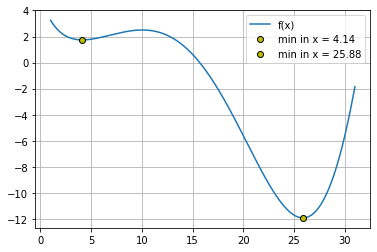

In [ ]:
x = np.linspace(1,31,num=10**3)
fig = mpl.pyplot.figure()
plt.plot(x, f(x), label='f(x)')
plt.plot(min_f0.x, min_f0.fun, 'o', markeredgecolor='k', markerfacecolor='y', 
         label='min in x = %.2f' % min_f0.x)
plt.plot(min_f1.x, min_f1.fun, 'o', markeredgecolor='k', markerfacecolor='y', 
         label='min in x = %.2f' % min_f1.x)
plt.grid()
plt.legend()
plt.show()

##Оптимизация гладкой функции (методом дифференциальной эволюции)

In [ ]:
min_f_de = differential_evolution(f, [(1,30)])
print("global minimum is f(%.2f) = %.2f" % (min_f_de.x, min_f_de.fun))

global minimum is f(25.88) = -11.90


In [ ]:
# create file submission_2
my_file = open('submission_2.txt', 'w')
# write the desired function value to it
text_for_file = "%.2f" % min_f_de.fun
my_file.write(text_for_file)

my_file.close()

##Оптимизация негладкой функции

In [ ]:
# creating a non-smooth function int(f(x))
def int_f(x):
  return int(f(x))

def pl_int_f(x):
  return [int(f(x[j])) for j in range(len(x))]

In [ ]:
# the first method of minimization by the BFGS algorithm with initial x0 = 30
min_intf = minimize(int_f, 30, method = 'BFGS')
# the second method of minimization by the differential_evolution algorithm
min_intf_de = differential_evolution(int_f, [(1,30)])

print("minimum by BFGS is f(%.2f) = %.2f \n" \
      "global minimum by DE is f(%.2f) = %.2f"
      % (min_intf.x, min_intf.fun, min_intf_de.x, min_intf_de.fun))

# create file submission_3
my_file = open('submission_3.txt', 'w')
# write the desired function value to it
my_file.writelines(" ".join(map(lambda x: "%.2f" % x, (min_intf.fun, min_intf_de.fun))))

my_file.close()

minimum by BFGS is f(30.00) = -5.00 
global minimum by DE is f(27.52) = -11.00


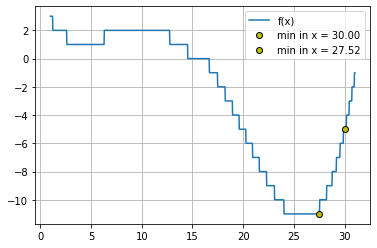

In [ ]:
# plotting a non-smooth function int(f(x))
x = np.linspace(1,31,num=10**3)
fig = mpl.pyplot.figure()
plt.plot(x, pl_int_f(x), label='f(x)')
plt.plot(min_intf.x, min_intf.fun, 'o', markeredgecolor='k', markerfacecolor='y', 
         label='min in x = %.2f' % min_intf.x)
plt.plot(min_intf_de.x, min_intf_de.fun, 'o', markeredgecolor='k', markerfacecolor='y', 
         label='min in x = %.2f' % min_intf_de.x)
plt.grid(), plt.legend()
plt.show()